In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as plticker
from matplotlib.gridspec import GridSpec


In [4]:
def set_size(width = 'neurips', fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'neurips':
        width_pt = 397.48499
    elif width == 'icml':
        width_pt = 234.8775
    elif width == 'cvpr':
        width_pt = 233.8583
    elif width == 'iccv':
        width_pt = 496.063
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2
    # golden_ratio = 0.8

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


# Using seaborn's style
width = 'iccv'


# Set the style to match scientific plotting conventions
plt.style.use('seaborn-v0_8-whitegrid')

# Configure global plot settings
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.linewidth': 1,
    'axes.labelsize': 12,
    'lines.linewidth': 1,
    'grid.linewidth': 0.5,
    'grid.alpha': 0.3,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

markersize = 8


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_dir = ""

filenames = [ "1c_unet_predictions.pkl", "CNNFullRes_predictions.pkl", "dfc_unet_predictions.pkl",]

colors = ["#FFC107", "#E64A19","#1E88E5"]
labels = ['Recon-SVM(S)', 'U-net(S)', 'FLASHµ(S)']
markers = [ '-*', '-o', '-s',]
alphas = [1, 1, 1]

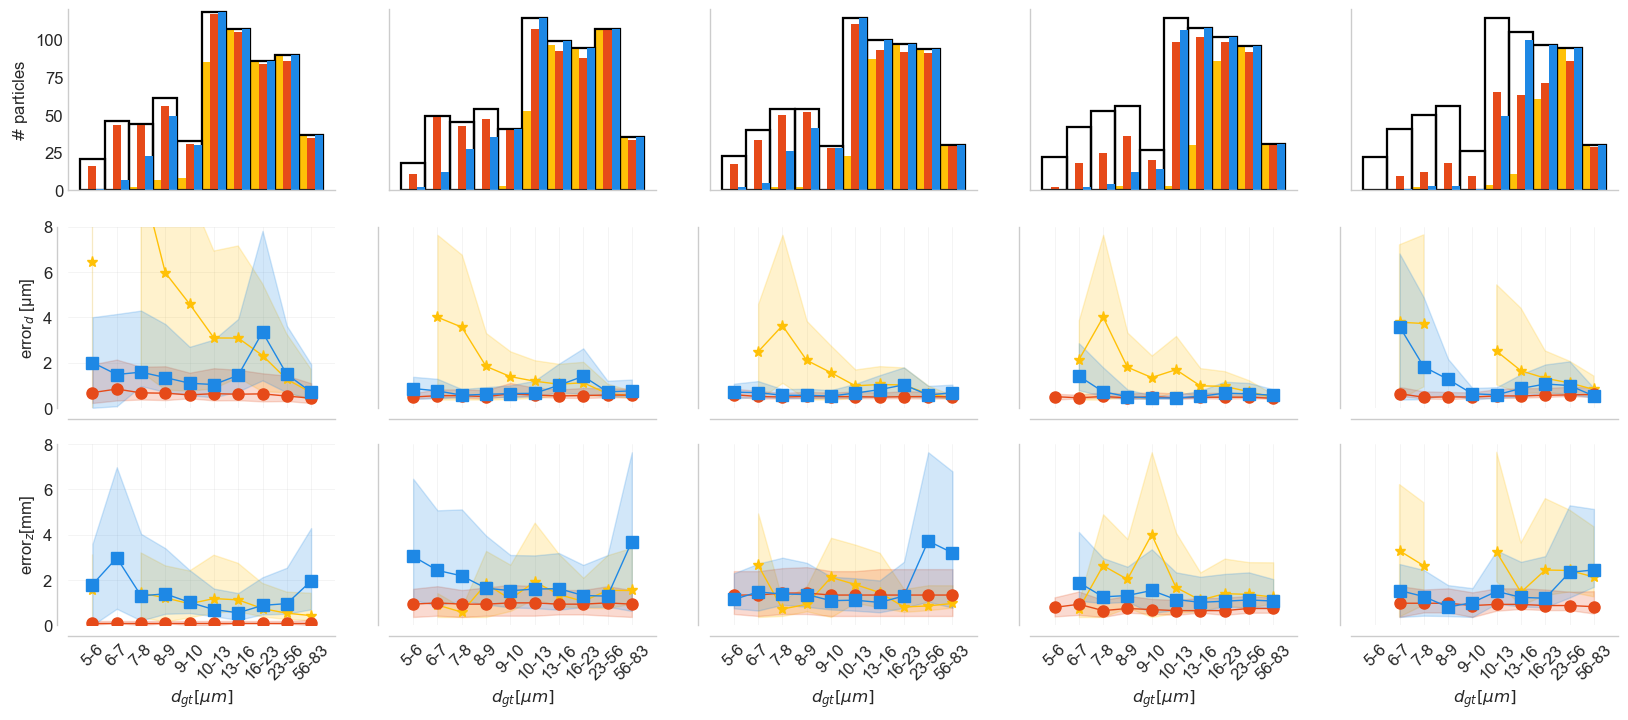

In [ ]:
Z = [50, 75, 99, 167, 192,]
width = 0.33  # the width of the bars
multiplier = 0
d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]
center_points_for_d_bins = [int((d_bins[i]+d_bins[i+1])/2) for i in range(len(d_bins)-1)]
xticklabels = [f"{int(d_bins[i]-0.5)}-{int(d_bins[i+1]-0.5)}" for i in range(len(d_bins)-1)]
fig, axes = plt.subplots(3,5, figsize=(4*5, 4*2), sharex='col')

for c, filename in enumerate(filenames):
    offset = width * multiplier
    data = np.load(data_dir+filename, allow_pickle=True)

    z_det = data["z_detected"]
    z_pred = data["z_predicted"]
    ez = np.abs(z_det - z_pred)
    d_det = data["d_detected"]
    d_pred = data["d_predicted"]
    ed = np.abs(d_det - d_pred)

    z_total = data["z_all_in_gt"]
    d_total = data["d_all_in_gt"]



    for j,z in enumerate(Z):
        errors_d_d = {}
        errors_z_d = {}
        z_mask = z_det == z
        get_bin_idx = np.digitize(d_det[z_mask], bins = d_bins)
        
        
        for i, size in enumerate(center_points_for_d_bins):
            if size not in errors_d_d:
                errors_d_d[size] = []
                errors_z_d[size] = []
                
            errors_d_d[size].append([ed[z_mask][get_bin_idx == i+1]])
            errors_z_d[size].append([ez[z_mask][get_bin_idx == i+1]])
            
        
        fc_ed_d = np.array([np.median(errors_d_d[key][0]) for key in errors_d_d])
        fc_ed_d_std = []
        fc_ed_d_3rdq = []
    
        for key in errors_d_d:
            if len(errors_d_d[key][0][0]) > 0:
                fc_ed_d_std.append(np.quantile(errors_d_d[key][0], 0.25))
                fc_ed_d_3rdq.append(np.quantile(errors_d_d[key][0], 0.75))
            else:
                fc_ed_d_std.append(np.nan)
                fc_ed_d_3rdq.append(np.nan)

        fc_ez_d = np.array([np.median(errors_z_d[key][0]) for key in errors_z_d])
        fc_ez_d_std = []
        fc_ez_d_3rdq = []
        for key in errors_d_d:
            if len(errors_d_d[key][0][0]) > 0:
                fc_ez_d_std.append(np.quantile(errors_z_d[key][0], 0.25))
                fc_ez_d_3rdq.append(np.quantile(errors_z_d[key][0], 0.75))
            else:
                fc_ez_d_std.append(np.nan)
                fc_ez_d_3rdq.append(np.nan)
              
       
        d_keys = [key for key in errors_d_d]

        ax0 = axes[0, j]
        fc_d_det = d_det[z_mask]

        hist, bin_centers = np.histogram(d_total[z_total == z], d_bins)
        tmp_range = np.arange(0,len(hist))
        if c == 0 or c == 2 or c==1:
            data = np.load(data_dir+filenames[2], allow_pickle=True)
            z_total = data["z_all_in_gt"]
            d_total = data["d_all_in_gt"]
            hist_gt, bin_centers = np.histogram(d_total[z_total == z], d_bins)
            ax0.bar(tmp_range, hist_gt, width = 1, color = 'none', edgecolor = 'black', label = 'GT', linewidth = 1.5)
        
        hist, bin_centers = np.histogram(fc_d_det, d_bins)
            
        tmp_range = np.arange(0,len(hist))
        ax0.bar(tmp_range+offset-0.33, hist, width, alpha = 1, label = labels[c], color = colors[c])
        ax0.set_xticks(tmp_range)
        ax0.set_xscale("linear")

    




        ax1 = axes[1,j]

        ax1.plot(tmp_range, fc_ed_d, markers[c] ,color = colors[c], markersize = markersize, label = labels[c], alpha = alphas[c])
        ax1.fill_between(tmp_range, fc_ed_d-fc_ed_d_std, fc_ed_d+fc_ed_d_3rdq, color=colors[c], alpha=0.2)
        ax1.set_xscale('linear')
        ax1.set_xticks(tmp_range,)
        ax1.set_xticklabels(""*len(d_keys), ha='right')
        
        ax2 = axes[2,j]

        ax2.plot(tmp_range, fc_ez_d, markers[c], color = colors[c], markersize = markersize, label = labels[c], alpha = alphas[c])
        ax2.fill_between(tmp_range, fc_ez_d-fc_ez_d_std, fc_ez_d+fc_ez_d_3rdq, color=colors[c], alpha=0.2)
        ax2.set_xscale('linear')
        ax2.set_xticks(tmp_range,)

        ax0.xaxis.set_visible(False)
        ax0.yaxis.grid(False)
        sns.despine(ax = ax0)
        sns.despine(ax = ax1,offset=8,)
        sns.despine(ax = ax2,offset=8,)

        if j>0:
            ax0.yaxis.set_visible(False)
            ax1.yaxis.set_visible(False)
            ax2.yaxis.set_visible(False)

        if j==0:
            ax0.set_ylabel(r"$\#$ particles")
            ax1.set_ylabel(r"error$_d$ [µm]")
            ax2.set_ylabel(r"error$_z$[mm]")
            ax0.set_ylim(0,120)
            ax1.set_ylim(0,8)
            ax2.set_ylim(0,8)
            
        ax2.set_xlabel(rf"$d_{{gt}}[\mu m]$")
        

        ax2.set_xticks(range(len(xticklabels)))
        ax2.set_xticklabels(xticklabels,rotation = 45)

        

    multiplier += 1
save_dir = ""

# plt.savefig(save_dir+"_sizehistogram_error_plots_.pdf", bbox_inches = 'tight', format = 'pdf')

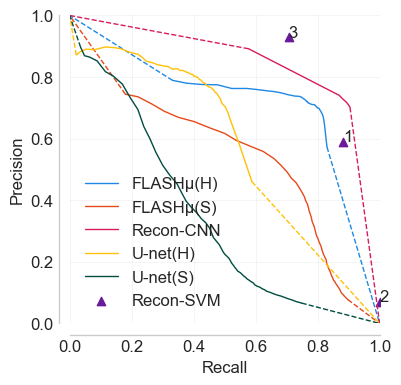

In [ ]:
data_dir = ""

filenames = ["flashµ_h.pkl", "flashµ_s.pkl",
             "CNNFullRes_predictions.pkl","1c_unet_predictions_h.pkl",
              "1c_unet_predictions_s.pkl",]
colors = ["#1E88E5","#E64A19","#D81B60","#FFC107","#004D40","#6A1B9A",]
fig = plt.figure(figsize=(4,4))


markers = ['-']+['-']*(len(filenames)-1)
alphas = [0.5, 0.3]

starter = 40

labels = ['FLASHµ(H)','FLASHµ(S)','Recon-CNN','U-net(H)','U-net(S)','Recon-SVM']
for i in range(len(filenames)):
    data = np.load(data_dir+filenames[i], allow_pickle=True)
    prec = data["precision"]
    rec = data["recall"]
    if i!=2:
        plt.plot(rec[:-starter], prec[:-starter], markers[i] ,color = colors[i], label = labels[i], markersize = 1)
        plt.plot([rec[-starter-1]]+[0], [prec[-starter-1]]+[1] ,color = colors[i], ls = '--')
        plt.plot([rec[0]]+[1], [prec[0]]+[0] ,color = colors[i], ls = '--')

    else:
        plt.plot(rec[:], prec[:], markers[i] ,color = colors[i], label = labels[i], markersize =  1)
        plt.plot([rec[-1]]+[0], [prec[-1]]+[1] ,color = colors[i], ls = '--')
        plt.plot([rec[0]]+[1], [prec[0]]+[0] ,color = colors[i], ls = '--')


svm_precs = [0.5900, 0.07, 0.93]
svm_recs = [0.8829, 1.0, 0.7065]
plt.scatter(svm_recs, svm_precs, marker='^', color = colors[-1], label = labels[-1])
for i in range(len(svm_precs)):
    plt.text(svm_recs[i], svm_precs[i], s = str(i+1))




plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
sns.despine(fig, trim=True, offset=8)

save_dir = ""

plt.xlabel(r"Recall")
plt.ylabel(r"Precision")

plt.savefig(save_dir+"_precision_recall_.png", bbox_inches = 'tight', format = 'png')